# Statistical Evidence and Testing
_Bryan Graham - University of California - Berkeley_  

January 2019
<br>
<br>
#### Code citation:
<br>
Graham, Bryan S. (2019). "Statistical Evidence and Testing Python Jupyter Notebook," (Version 1.0) [Computer program]. Available at http://bryangraham.github.io/econometrics/ (Accessed 27 May 2019)
<br>
<br>

In [1]:
# Direct Python to plot all figures inline (i.e., not in a separate window)
%matplotlib inline

# Load libraries
import numpy as np
import numpy.linalg
import scipy as sp

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.power as smp

In [2]:
# Directory where figures generated below are saved
workdir =  '/Users/bgraham/Dropbox/Teaching/Berkeley_Courses/Ec141/Spring2019/Notebooks/'

Imagine you are walking down Madison Avenue in New York City. You are approached by a man who introduces himself as Blaise Pascal. He makes the following proposition: "Foolish tourist, give me 20 dollars, then flip this fair coin 10 times. If you get more than 5 heads, I will pay you 50 dollars. If you get five or fewer heads I pay you nothing."
<br>
<br>
It turns out you are fairly clever. Since any particular sequence of heads and tails across 10 coin flips is as equally likely as any other, in order to calculate your odds of winning you just need to do a bit of counting. Since each flip has just two outcomes, and you flip a total of 10 times, there are a total of $2^{10}$ possible coin flip sequences. To win the bet you need to get _at least_ six heads. There are $\binom{10}{6} = 210$ ways to get 6 heads across 10 coin flips. But since 7, 8, 9 or 10 heads will also result in you winning, you calculate:

<div>$$ \textrm{Chance of winning} = \frac{\binom{10}{6}+\binom{10}{7}+\binom{10}{8}
                                          +\binom{10}{9}+\binom{10}{10}}{2^{10}} 
                                   =  \frac{386}{1024}$$ </div>
                                                         
Out of the 1024 possible sequences of heads and tails across 10 coin flips, 384 will have _at least_ six heads. Your chance of winning is therefore about 38 percent. If you win Blaise promises you 50 dollars. Given that you need to pay Blaise 20 dollars just to play his game you calculate your expected winnings as

<div>$$ \textrm{Expected winnings} = \textrm{Probability of Winning} \times \$50 - \$20 = -\$1.15 $$ </div>

After doing the above calculations you say to Blaise: "Why would I accept these terms, in expectation I will lose 1 dollar and 15 cents?" Blaise replies: "Part of your compensation is the thrill of playing and, anyways, I need to make a living somehow. The odds are much worse at the Hard Rock Hotel and Casino Atlantic City."
<br>
<br>
You consider this for a moment. Blaise even has a fresh 50 dollar bill right in his hand. As it turns out you just finished both volumes of Ulysses S. Grant's _Personal Memoirs_, hence the 50 dollar bill that Blaise is waving before you looks unusually enticing. Blaise notices the nice two volume leather bound _Personal Memoirs_ set under your arms and nods at them knowingly. He smiles hopefully.
<br>
<br>
You decide to go for it! He hands you his coin. You flip it 10 times, but only get three heads. Blaise chuckles, you feel completely swindled, and hobble off feeling defeated. Indeed you feel completely stupid. If you wanted a 50 dollar bill you could have just asked for one from the bank teller after all.
<br>
<br>
This next snippet of code calculates your chance of winning Blaise's wager and its expected value.

In [3]:
n = 10     # Number of coin flips
p = 0.5    # Probability if heads for a fair coin 

Cost     = 20                                 # Cost to play                           
Prize    = 50                                 # Prize paid if get more than 5 heads out of ten flips
Pr_Win   = 1 - sp.stats.binom.cdf(5, n, p)    # Chance of winning
Expected_Value_of_Bet = Pr_Win*Prize - Cost   # Expected value of the bet

print("Chance of winning is " + "%0.2f" % Pr_Win) 
print("Expected value of bet is " + '${:,.2f}'.format(Expected_Value_of_Bet)) 

Chance of winning is 0.38
Expected value of bet is $-1.15


As you walk away wounded. The thought occurs to you that Blaise may have been cheating. You decide to calculate the frequency of the number of heads out of 10 flips under two scenarios. The _null_ scenario is that the coin is fair, with a probability of 0.5 of landing heads and 0.5 of landing tails. You call this the _null_ scenario since it seems fair to give Blaise the benefit of the doubt. You don't want to accuse him of cheating unless you can present strong evidence that the coin is _not_, in fact, fair.
<br>
<br>
To see what the effect of flipping a biased coin is on the probability of winning Blaise's wager, you also calculate the frequency of the number of heads out of 10 flips under the _alternative_ scenario where the probability of the coin landing heads is 0.4 and the probability of it landing tails is 0.6
<br>
<br>
The next snippet of code constructs the probability mass function for "number of coin flips out of 10 landing heads" under the _null_ and _alternative_ scenarios.

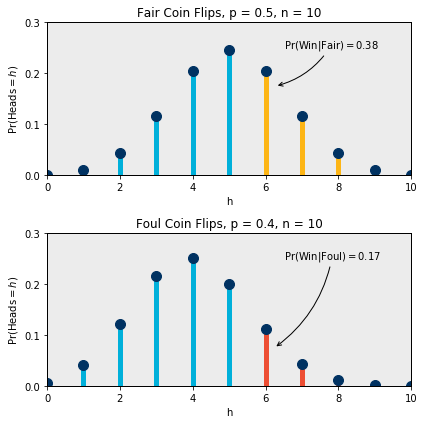

In [4]:
n = 10
p = 0.5
p_bias = 0.4


fig_coin_flips_pmf = plt.figure(figsize=(6, 6))    

# Calculate pmf of "number heads out of 10 flips" under the two scenarios
coin_flip_pmf = []
for h in range(0,n+1,1):
    coin_flip_pmf.append([h,sp.stats.binom.pmf(h, n, p), sp.stats.binom.pmf(h, n, p_bias)])

num_heads = np.array(coin_flip_pmf)[:,0]
pmf       = np.array(coin_flip_pmf)[:,1]
bias_pmf  = np.array(coin_flip_pmf)[:,2]

# ------------------------------------------ #
# - FAIR COIN pmf PL                       - #
# ------------------------------------------ #

ax = fig_coin_flips_pmf.add_subplot(2,1,1)

# Plot pmf of the random variable: number of heads across 10 fair coin flips
ax.plot(num_heads, pmf, 'o', color='#003262', ms=10, label='binom pmf') 
ax.vlines(num_heads[0:6], 0, pmf[0:6], colors='#00B0DA', lw=5)
ax.vlines(num_heads[6:], 0, pmf[6:], colors='#FDB515', lw=5)
ax.annotate(r'$\Pr (\mathrm{Win}|\mathrm{Fair}) = $' + "%0.2f" % (1-sp.stats.binom.cdf(5, n, p)) , \
            xy=(6.28, 0.175), xytext=(6.5, 0.25), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2"), \
            horizontalalignment='left')

# Set axis labels
plt.title('Fair Coin Flips, p = ' + str(p) +', n = ' + str(n), fontsize=12)
plt.xlabel('h')
plt.ylabel(r'$\Pr (\mathrm{Heads} = h)$')
    
# Set plot range and tick marks
plt.ylim([0,0.3])
plt.xlim([0,n])  
plt.yticks([0, 0.1, 0.2, 0.3], fontsize=10)

# Clean up the plot, add frames, remove gridlines etc.
ax = plt.gca()
ax.patch.set_facecolor('gray')               # Color of background
ax.patch.set_alpha(0.15)                     # Translucency of background
ax.grid(False)                               # Remove gridlines from plot

# Add frame around plot
for spine in ['left','right','top','bottom']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_color('k')
    ax.spines[spine].set_linewidth(1)
    
# ------------------------------------------ #
# - FOUL COIN (p=0.4)                      - #
# ------------------------------------------ #    

ax = fig_coin_flips_pmf.add_subplot(2,1,2)

# Plot pmf of the random variable: number of heads across 10 foul (p=0.4) coin flips
ax.plot(num_heads, bias_pmf, 'o', color='#003262', ms=10, label='binom pmf') 
ax.vlines(num_heads[0:6], 0, bias_pmf[0:6], colors='#00B0DA', lw=5)
ax.vlines(num_heads[6:], 0, bias_pmf[6:], colors='#ED4E33', lw=5)
ax.annotate(r'$\Pr (\mathrm{Win}|\mathrm{Foul}) = $' + "%0.2f" % (1-sp.stats.binom.cdf(5, n, p_bias)) , \
            xy=(6.25, 0.075), xytext=(6.5, 0.25), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2"), \
            horizontalalignment='left')

# Set axis labels
plt.title('Foul Coin Flips, p = ' + str(p_bias) +', n = ' + str(n), fontsize=12)
plt.xlabel('h')
plt.ylabel(r'$\Pr (\mathrm{Heads} = h)$')
    
# Set plot range and tick marks
plt.ylim([0,0.3])
plt.xlim([0,n])  
plt.yticks([0, 0.1, 0.2, 0.3], fontsize=10)

# Clean up the plot, add frames, remove gridlines etc.
ax = plt.gca()
ax.patch.set_facecolor('gray')               # Color of background
ax.patch.set_alpha(0.15)                     # Translucency of background
ax.grid(False)                               # Remove gridlines from plot

# Add frame around plot
for spine in ['left','right','top','bottom']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_color('k')
    ax.spines[spine].set_linewidth(1)
    
# Increase spacing between subplots & save result
fig_coin_flips_pmf.subplots_adjust(hspace=0.4,wspace=0.25)
plt.tight_layout()
plt.savefig(workdir+'Fair_and_Foul_Coin_Flips.png', bbox_inches='tight', dpi=1000)       

Your calculations reveal at a 10 percentage point reduction in the per flip head probability, from 0.5 to 0.4, more than halves that chance of you winning Blaise's wager.
<br>
<br>
On the way back to your hotel you pass by Blaise on the street again. Just in time to observe him winning another wager with an out-of-town tourist life yourself. As you walk by a man approaches you and introduces himself as Pierre. He says to you: "It is quite amazing really. Blaise has now won his wager 10 times in a row! He's made 200 dollars on the day."
<br>
<br>
You think that this outcome is too good (for Blaise) to be true. You reason that since the outcome of each wager is independent (even if the coin is biased), the chance of winning 10 games in a row with a _fair_ coin is:

<div>$$ (\textrm{Probability of Winning|Fair})^{10} = 0.0088 $$ </div>

You think lucky indeed. There is a less than 1 percent chance of Blaise winning 10 wagers in a row with a fair coin. You are very suspicious now. To check your reasoning you also calculate the chance of Blaise winning 10 wagers in a row with a biased coin (per flip heads probability equal to 0.4). You get:

<div>$$ (\textrm{Probability of Winning|Foul})^{10} = 0.1623 $$ </div>

If Blaise is flipping a biased coin with this heads probability, winning 10 times in a row is also "lucky"...but in a normal way, in that it _should_ happen with some memorable regularity (about once a week if he run's his game daily).
<br>
<br>
Based on these calculates you conclude that Blaise is cheating. Your reasoning is that since you observed something that would occur only very rarely, less then 1 out of every 100 times, under the _null_ scenario that Blaise's coin is fair, it is likely that the coin is not fair. This is your _statistical evidence_ that Blaise is cheating.
<br>
<br>
Do you know if Blaise is cheating? Not really. Even with a fair coin Blaise will win 10 wagers in row every once in a while. Nevertheless since you are observing something that happens only very rarely if the coin is fair, you are willing to conclude that, in fact, the coin is biased (i.e., foul). Statistical evidence is always associated with some uncertainty. A good procedure should allow you to quantity this uncertainty and articulate its implications.

In [5]:
print("Chance of winning 10 games in a row with a fair coin:")
print("")
for g in [1,2,3,4,5,10,20]:
    print("Change of zero wins after " + str(g) +" games = " + "%0.4f" % sp.stats.binom.cdf(5, n, p)**g)

print("")     
print("Chance of winning 10 games in a row with a bias (p=0.4) coin:")
print("")
for g in [1,2,3,4,5,10,20]:
    print("Change of zero wins after " + str(g) +" games = " + "%0.4f" % sp.stats.binom.cdf(5, n, p_bias)**g)

Chance of winning 10 games in a row with a fair coin:

Change of zero wins after 1 games = 0.6230
Change of zero wins after 2 games = 0.3882
Change of zero wins after 3 games = 0.2419
Change of zero wins after 4 games = 0.1507
Change of zero wins after 5 games = 0.0939
Change of zero wins after 10 games = 0.0088
Change of zero wins after 20 games = 0.0001

Chance of winning 10 games in a row with a bias (p=0.4) coin:

Change of zero wins after 1 games = 0.8338
Change of zero wins after 2 games = 0.6952
Change of zero wins after 3 games = 0.5796
Change of zero wins after 4 games = 0.4832
Change of zero wins after 5 games = 0.4029
Change of zero wins after 10 games = 0.1623
Change of zero wins after 20 games = 0.0264


## Normal approximation
If you look at your pmf for the random variable "number of heads out of 10 flips of a fair coin" you'll notice it is bell-shaped. Note that for heads probability, $p$, the expected number of heads across $n$ independent coin flips is

<div>$$ \mathbb{E}[\textrm{Number of Heads out of n Flips}] = np $$ </div>

while its variance is

<div>$$ \mathbb{V}(\textrm{Number of Heads out of n Flips}) = np(1-p) $$ </div>

Now consider the normalized statistic

<div>$$ Z = \frac{\textrm{Number of Heads out of n Flips} - np}{\sqrt{np(1-p}} $$ </div>

First observe that $Z$ is just a one-to-one transformation of our original random variable "Number of Heads out of $n$ Flips". We already calculated the probability mass function for this random variable for the case of $n=10$ and can do so for general $n$ too. So it is easy enough to calculate the pmf (or cdf) for $Z$.

Second $Z$ is mean zero and has unit variance. It is for these reasons that we call it "normalized". It turns out that normalized statistics like $Z$, if they are themselves composed of an average of many independent random variables, will behave "as if" they were standard normal random variables if $n$ is large enough. This convergence in distribution is due to the _Central Limit Theorem_. This theorem allows us to treat many types of sample averages "as if" they were normal random variables. This is a very useful approximation. While this approximation is often good, it can also be quite poor in special cases.

The next snippet of code compares the actual distribution of Z to the reference $\mathcal{N}(0,1)$ The plot after the code shows the actual cdf of Z for $n = 5, 10, 20$ and $50$. This is the step-function in each of the for panels. Recall that $Z$ is discretely valued. The smooth curve in each panel is the reference $\mathcal{N}(0,1)$ cdf. We can visually see the approximation improve with $n$.

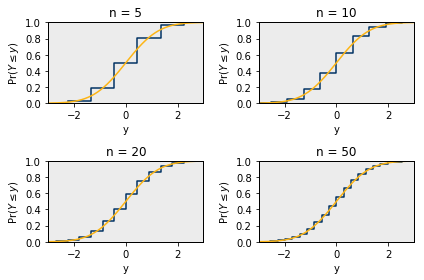

In [6]:
sample_size = [5, 10, 20, 50]
p = 0.5

fig_norm_approx = plt.figure(figsize=(6, 4))    

f = 1
for n in sample_size:
    coin_flip_cdf  = []
    coin_flip_norm = []

    for y in range(0,n+1,1):
        coin_flip_cdf.append([(y-n*p)/((n*p*(1-p))**0.5), sp.stats.binom.cdf(y, n, p)])

    for y in np.arange(-3,3,0.01):
        coin_flip_norm.append([y, sp.stats.norm.cdf(y, 0, 1)])    
    
    
    ax = fig_norm_approx.add_subplot(2,2,f)
    
    f += 1 
    
    num_heads = np.array(coin_flip_cdf)[:,0]
    cdf       = np.array(coin_flip_cdf)[:,1]

    norm_num_heads = np.array(coin_flip_norm)[:,0]
    norm_pdf       = np.array(coin_flip_norm)[:,1]

    ax.plot(num_heads, cdf, '-', drawstyle='steps-post', color='#003262', label='binom cdf')    
    ax.plot(norm_num_heads, norm_pdf, '-', color='#FDB515', label='norm cdf')    

    # Set axis labels
    plt.title('n = ' + str(n), fontsize=12)
    plt.xlabel('y')
    plt.ylabel(r'$\Pr (Y \leq y)$')

    # Set plot range and tick marks
    plt.ylim([0,1])
    plt.xlim([-3,3])  
    plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1], fontsize=10)

    # Clean up the plot, add frames, remove gridlines etc.
    ax = plt.gca()
    ax.patch.set_facecolor('gray')               # Color of background
    ax.patch.set_alpha(0.15)                     # Translucency of background
    ax.grid(False)                               # Remove gridlines from plot

    # Add frame around plot
    for spine in ['left','right','top','bottom']:
        ax.spines[spine].set_visible(True)
        ax.spines[spine].set_color('k')
        ax.spines[spine].set_linewidth(1)

# Increase spacing between subplots & save result
fig_norm_approx.subplots_adjust(hspace=0.6,wspace=0.4)
plt.tight_layout()
plt.savefig(workdir+'Normal_Approximation.png', bbox_inches='tight', dpi=1000)  

## Testing hypothesis

Assume we have a statistic that is composed of some average of independent random variables. We normalize this statistic by subtracting its mean _under some maintained null hypothesis_ and dividing by the square root of its variance (also as computed under the _maintained null hypothesis_ if relevant). By the CLT this statistic should behave like a $\mathcal{N}(0,1)$ if the _maintained null hypothesis_ is true.

We can use the above observation for hypothesis testing: (i) form a statistic that is approximately $\mathcal{N}(0,1)$ under a _maintained null hypothesis_, (ii) reject this hypothesis is we observe unusual values of the statistic.

For more on this idea see any introductory statistics textbook. The next two snippets of code reproduce the standard set of figures used to illustrate the logic of hypothesis testing. The first figure is for so called one-sided tests. The second for two-sided tests.

### Code to construct one-sided hypothesis test figure

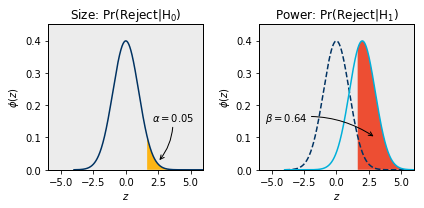

In [7]:
alpha = 0.05
crit  = sp.stats.norm.ppf(1-alpha)

size = []
power = []

fig_testing = plt.figure(figsize=(6, 3))    

for y in np.arange(-4,6,0.01):
    size.append([y, sp.stats.norm.pdf(y, 0, 1)])
    power.append([y, sp.stats.norm.pdf(y, 2, 1)])
 
size_z   = np.array(size)[:,0]
size_pdf = np.array(size)[:,1]

power_z   = np.array(power)[:,0]
power_pdf = np.array(power)[:,1]

# ----------------------------------- #
# - SIZE                            - #
# ----------------------------------- #

ax = fig_testing.add_subplot(1,2,1)
ax.plot(size_z, size_pdf, '-', color='#003262', label='norm pdf')   
ax.fill_between(size_z, size_pdf, where=size_z >= crit, facecolor='#FDB515', interpolate=True) 
ax.annotate(r'$\alpha = 0.05$', xy=(2.5, 0.025), xytext=(2, 0.15),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2"), horizontalalignment='left')

# Set axis labels
plt.title(r'Size: $\Pr (\mathrm{Reject}|\mathrm{H_{0}})$', fontsize=12)
plt.xlabel(r'$z$')
plt.ylabel(r'$\phi (z)$')
    
# Set plot range and tick marks
plt.ylim([0,0.45])
plt.xlim([-6,6])  
plt.yticks([0, 0.1, 0.2, 0.3, 0.4], fontsize=10)

# Clean up the plot, add frames, remove gridlines etc.
ax = plt.gca()
ax.patch.set_facecolor('gray')               # Color of background
ax.patch.set_alpha(0.15)                     # Translucency of background
ax.grid(False)                               # Remove gridlines from plot

# Add frame around plot
for spine in ['left','right','top','bottom']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_color('k')
    ax.spines[spine].set_linewidth(1)
    
# ----------------------------------- #
# - POWER                           - #
# ----------------------------------- #

ax = fig_testing.add_subplot(1,2,2)
ax.plot(size_z, size_pdf, '--', color='#003262', label='norm pdf')   
ax.plot(power_z, power_pdf, '-', color='#00B0DA', label='norm pdf')   
ax.fill_between(power_z, power_pdf, where=power_z >= crit, facecolor='#ED4E33', interpolate=True) 
ax.annotate(r'$\beta = $' + "%0.2f" % (1 - sp.stats.norm.cdf(crit, 2, 1)) , xy=(3, 0.1), xytext=(-5.5, 0.15),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2"), horizontalalignment='left')

# Set axis labels
plt.title(r'Power: $\Pr (\mathrm{Reject}|\mathrm{H_{1}})$', fontsize=12)
plt.xlabel(r'$z$')
plt.ylabel(r'$\phi (z)$')
    
# Set plot range and tick marks
plt.ylim([0,0.45])
plt.xlim([-6,6])  
plt.yticks([0, 0.1, 0.2, 0.3, 0.4], fontsize=10)

# Clean up the plot, add frames, remove gridlines etc.
ax = plt.gca()
ax.patch.set_facecolor('gray')               # Color of background
ax.patch.set_alpha(0.15)                     # Translucency of background
ax.grid(False)                               # Remove gridlines from plot

# Add frame around plot
for spine in ['left','right','top','bottom']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_color('k')
    ax.spines[spine].set_linewidth(1)

# Increase spacing between subplots & save result
fig_testing.subplots_adjust(hspace=0.4,wspace=0.25)
plt.tight_layout()
plt.savefig(workdir+'Size_and_Power_One_Sided.png', bbox_inches='tight', dpi=1000)      

### Code to construct two-sided hypothesis test figure

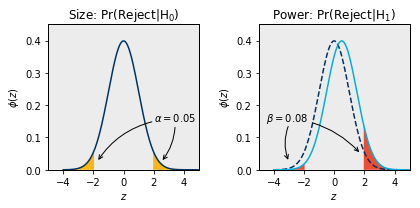

In [8]:
alpha = 0.05
crit  = sp.stats.norm.ppf(1-alpha/2)

size = []
power = []

fig_testing = plt.figure(figsize=(6, 3))    

for y in np.arange(-4,5,0.01):
    size.append([y, sp.stats.norm.pdf(y, 0, 1)])
    power.append([y, sp.stats.norm.pdf(y, 0.5, 1)])
 
size_z   = np.array(size)[:,0]
size_pdf = np.array(size)[:,1]

power_z   = np.array(power)[:,0]
power_pdf = np.array(power)[:,1]

# ----------------------------------- #
# - SIZE                            - #
# ----------------------------------- #

ax = fig_testing.add_subplot(1,2,1)
ax.plot(size_z, size_pdf, '-', color='#003262', label='norm pdf')   
ax.fill_between(size_z, size_pdf, where=size_z >= sp.stats.norm.ppf(1-alpha/2), facecolor='#FDB515', interpolate=True)
ax.fill_between(size_z, size_pdf, where=size_z <= sp.stats.norm.ppf(alpha/2), facecolor='#FDB515', interpolate=True)
ax.annotate(r'$\alpha = 0.05$', xy=(2.5, 0.025), xytext=(2, 0.15),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2"), horizontalalignment='left')
ax.annotate("", xy=(-1.75, 0.025), xytext=(2, 0.15),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"), horizontalalignment='left')

# Set axis labels
plt.title(r'Size: $\Pr (\mathrm{Reject}|\mathrm{H_{0}})$', fontsize=12)
plt.xlabel(r'$z$')
plt.ylabel(r'$\phi (z)$')
    
# Set plot range and tick marks
plt.ylim([0,0.45])
plt.xlim([-5,5])  
plt.yticks([0, 0.1, 0.2, 0.3, 0.4], fontsize=10)

# Clean up the plot, add frames, remove gridlines etc.
ax = plt.gca()
ax.patch.set_facecolor('gray')               # Color of background
ax.patch.set_alpha(0.15)                     # Translucency of background
ax.grid(False)                               # Remove gridlines from plot

# Add frame around plot
for spine in ['left','right','top','bottom']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_color('k')
    ax.spines[spine].set_linewidth(1)
    
# ----------------------------------- #
# - POWER                           - #
# ----------------------------------- #

ax = fig_testing.add_subplot(1,2,2)
ax.plot(size_z, size_pdf, '--', color='#003262', label='norm pdf')   
ax.plot(power_z, power_pdf, '-', color='#00B0DA', label='norm pdf')   
ax.fill_between(power_z, power_pdf, where=power_z >=  crit, facecolor='#ED4E33', interpolate=True)
ax.fill_between(power_z, power_pdf, where=power_z <= -crit, facecolor='#ED4E33', interpolate=True) 
ax.annotate(r'$\beta = $' + "%0.2f" % (sp.stats.norm.cdf(-crit, 0.5, 1) + (1 - sp.stats.norm.cdf(crit, 0.5, 1))) , \
            xy=(1.75, 0.05), xytext=(-4.5, 0.15), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=-.2"), \
            horizontalalignment='left')
ax.annotate("" , \
            xy=(-3, 0.025), xytext=(-3, 0.14), arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"), \
            horizontalalignment='left')

# Set axis labels
plt.title(r'Power: $\Pr (\mathrm{Reject}|\mathrm{H_{1}})$', fontsize=12)
plt.xlabel(r'$z$')
plt.ylabel(r'$\phi (z)$')
    
# Set plot range and tick marks
plt.ylim([0,0.45])
plt.xlim([-5,5])  
plt.yticks([0, 0.1, 0.2, 0.3, 0.4], fontsize=10)

# Clean up the plot, add frames, remove gridlines etc.
ax = plt.gca()
ax.patch.set_facecolor('gray')               # Color of background
ax.patch.set_alpha(0.15)                     # Translucency of background
ax.grid(False)                               # Remove gridlines from plot

# Add frame around plot
for spine in ['left','right','top','bottom']:
    ax.spines[spine].set_visible(True)
    ax.spines[spine].set_color('k')
    ax.spines[spine].set_linewidth(1)

# Increase spacing between subplots & save result
fig_testing.subplots_adjust(hspace=0.4,wspace=0.25)
plt.tight_layout()
plt.savefig(workdir+'Size_and_Power_Two_Sided.png', bbox_inches='tight', dpi=1000)      

In [9]:
# This imports an attractive notebook style from Github
from IPython.display import HTML
from urllib.request import urlopen
html = urlopen('http://bit.ly/1Bf5Hft')
HTML(html.read().decode('utf-8'))